# Tarefas

- Pesquisar base de dados do enem
- Tirar amostra de 10% de usuarios
- Pegar a média de todos os usuários
- Comparar a média das notas dos homem e mulheres
- Comparar a médias das notas dos homes negros brancos pardos e indígenas
- Comparar a média das notas de mulheres negras brancas pardas e indígenas
- Graficos
- de cada materia


In [1]:
#Importando bilbiotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Buscando planilia
#Foi usado o 'ISO-8859-1', por apresentar error ao usar o utf-8.
df = pd.read_csv('MICRODADOS_ENEM_2020.csv', sep = ';', encoding = 'ISO-8859-1')

In [3]:
df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,200003396891,2020,2,F,1,1,1,2,0,2,...,B,A,A,B,A,A,D,A,B,B
5783105,200006040822,2020,3,M,1,1,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783106,200004928656,2020,3,F,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783107,200006774808,2020,4,F,1,1,1,2,0,3,...,B,B,B,D,B,B,E,A,D,B


## Tratamento do DataFrame
- Excluindo colunas desnecessarias
- Tirando usuarios que não fizeram nenhuma etapa da prova
- Criando uma nova planilha 

In [4]:
print (list(df.columns))
#Mostrando a lista de colunas

['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 

Excluindo colunas que não são necessarias

In [5]:
df = df.drop(columns = ['TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
                        'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO','CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 
                        'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA', 
                        'CO_UF_PROVA', 'CO_PROVA_CN', 
                        'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 
                        'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                        'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
                        'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                        'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025','NU_ANO',
                       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', ])

In [6]:
df
#Mostrando a lista para ver como ficou

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,200006271946,F,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,200001195856,M,3,1,1,1,1,604.1,661.7,595.3,711.3,580.0
2,200001943954,F,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,200001908998,M,3,1,1,1,1,620.8,675.0,624.2,759.4,760.0
4,200001634757,F,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,200003396891,F,1,1,1,1,1,508.3,661.4,658.3,725.7,900.0
5783105,200006040822,M,1,1,1,1,1,570.5,646.1,607.2,719.5,660.0
5783106,200004928656,F,1,1,1,1,1,418.8,597.5,674.5,648.1,660.0
5783107,200006774808,F,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.loc[(df['TP_PRESENCA_CH'] == 1) |
                        (df['TP_PRESENCA_CN'] == 1) |
                        (df['TP_PRESENCA_LC'] == 1) |
                        (df['TP_PRESENCA_MT'] == 1)]
#Removendo linhas em que TODAS elas correspondem com valor 0

In [8]:
df

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,200001195856,M,3,1,1,1,1,604.1,661.7,595.3,711.3,580.0
3,200001908998,M,3,1,1,1,1,620.8,675.0,624.2,759.4,760.0
5,200003132410,F,3,1,1,1,1,498.1,604.7,505.4,526.7,700.0
7,200001334237,M,1,1,1,1,1,604.6,604.8,562.1,753.2,600.0
8,200006762554,F,3,1,1,1,1,439.7,383.5,486.2,448.5,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5783103,200001819135,M,1,1,1,1,1,547.3,613.3,596.4,469.1,660.0
5783104,200003396891,F,1,1,1,1,1,508.3,661.4,658.3,725.7,900.0
5783105,200006040822,M,1,1,1,1,1,570.5,646.1,607.2,719.5,660.0
5783106,200004928656,F,1,1,1,1,1,418.8,597.5,674.5,648.1,660.0


## Tirando 10% de toda a planilha

In [9]:
conta = 2762899/10
print(conta)
#Fazendo a conta para tirar 10% do valor total

276289.9


In [10]:
df2 = df.sample(276289).reset_index()
#Pegando aleatoriamente linhas da tabela e inserindo em uma variavel nova

In [11]:
# Removendo colunas que não iram mais ser utilizadas
df2 = df.drop(columns =['TP_PRESENCA_CN','TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'])
df2

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,200001195856,M,3,604.1,661.7,595.3,711.3,580.0
3,200001908998,M,3,620.8,675.0,624.2,759.4,760.0
5,200003132410,F,3,498.1,604.7,505.4,526.7,700.0
7,200001334237,M,1,604.6,604.8,562.1,753.2,600.0
8,200006762554,F,3,439.7,383.5,486.2,448.5,600.0
...,...,...,...,...,...,...,...,...
5783103,200001819135,M,1,547.3,613.3,596.4,469.1,660.0
5783104,200003396891,F,1,508.3,661.4,658.3,725.7,900.0
5783105,200006040822,M,1,570.5,646.1,607.2,719.5,660.0
5783106,200004928656,F,1,418.8,597.5,674.5,648.1,660.0


## Tirando a média de todos os usuários

In [12]:
df2['MEDIA_TOTAL'] = (df2['NU_NOTA_CN'] + df2['NU_NOTA_CH'] + df2['NU_NOTA_LC']
+ df2['NU_NOTA_MT'] + df2['NU_NOTA_REDACAO']) / 5
#Tirando a média de todas as pessoas.

### Mostrando a quantidade total de homens e mulheres da tabela

In [16]:
# Renomeando 'F' e 'M', para Feminino e Masculino
df2['TP_SEXO'].replace(['F'], 'Feminino',inplace = True)
df2['TP_SEXO'].replace(['M'], 'Masculino',inplace = True)

In [17]:
frequencia = df2['TP_SEXO'].value_counts()
print(frequencia)

Feminino     1668254
Masculino    1094645
Name: TP_SEXO, dtype: int64


### Grafico da média total
O grafico a baixo, representa a média das notas entre o sexo masculino e feminino.
E percebe-se que as notas masculinas foram as melhores.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinado sexo que fizeram a prova.

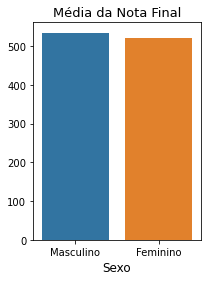

In [18]:
fig, ax = plt.subplots(figsize=(3,4))
sns.barplot(x = df2['TP_SEXO'], y = df2['MEDIA_TOTAL'], estimator = np.mean, ax = ax, data = df2)
#Mudando a aparencia do gráfico
ax.set_title("Média da Nota Final", fontdict={'fontsize':13})
ax.set_xlabel('Sexo', fontdict={'fontsize':12})
ax.set_ylabel('')
plt.show()

### Grafico das notas em Ciências da Natureza
O gráfico a baixo, representa a média de notas em ciências da natureza.
E percebe-se que as notas masculinas foram melhores.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinado sexo que fizeram a prova.

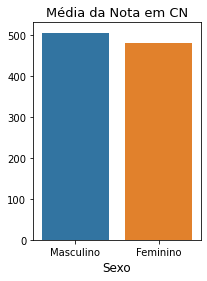

In [19]:
fig, ax = plt.subplots(figsize=(3,4))
sns.barplot(x = df2['TP_SEXO'], y = df2['NU_NOTA_CN'],estimator = np.mean, data = df2)
#Mudando a aparencia do gráfico
ax.set_title("Média da Nota em CN", fontdict={'fontsize':13})
ax.set_xlabel('Sexo', fontdict={'fontsize':12})
ax.set_ylabel('')
plt.show()

### Grafico das notas em Ciências Humanas
O gráfico a baixo,representa a média das notas em ciências humanas.
E percebe-se que as notas masculinas foram melhores.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinado sexo que fizeram a prova.

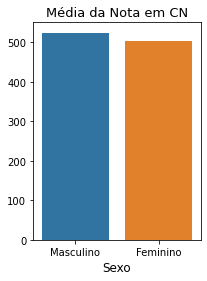

In [20]:
fig, ax = plt.subplots(figsize=(3,4))
sns.barplot(x = df2['TP_SEXO'], y = df2['NU_NOTA_CH'], estimator = np.mean, data = df2)
#Mudando a aparencia do gráfico
ax.set_title("Média da Nota em CN", fontdict={'fontsize':13})
ax.set_xlabel('Sexo', fontdict={'fontsize':12})
ax.set_ylabel('')
plt.show()

### Grafico das notas em Linguagens e Códigos
O gráfico a baixo,representa a média das notas em Linguagens e Códigos.
E percebe-se que as notas masculinas foram melhores.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinado sexo que fizeram a prova.

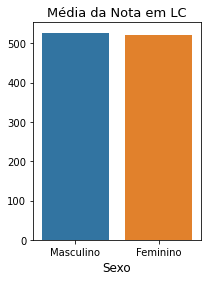

In [21]:
fig, ax = plt.subplots(figsize=(3,4))
sns.barplot(x = df2['TP_SEXO'], y = df2['NU_NOTA_LC'], estimator = np.mean, data = df2)
#Mudando a aparencia do gráfico
ax.set_title("Média da Nota em LC", fontdict={'fontsize':13})
ax.set_xlabel('Sexo', fontdict={'fontsize':12})
ax.set_ylabel('')
plt.show()

### Gráfico das notas em Matemática
O gráfico a baixo, representa a média das notas em Matemática.
E percebe-se que as notas masculinas foram melhores.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinado sexo que fizeram a prova.

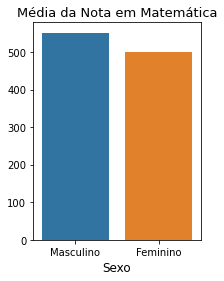

In [22]:
fig, ax = plt.subplots(figsize=(3,4))
sns.barplot(x = df2['TP_SEXO'], y = df2['NU_NOTA_MT'], estimator = np.mean, data = df2)
#Mudando a aparencia do gráfico
ax.set_title("Média da Nota em Matemática", fontdict={'fontsize':13})
ax.set_xlabel('Sexo', fontdict={'fontsize':12})
ax.set_ylabel('')
plt.show()

### Gráfico das notas em Redação
O gráfico a baixo, representa a média das notas em Redação.
E percebe-se que as notas Femininas foram melhores.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinado sexo que fizeram a prova.

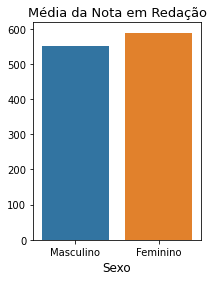

In [23]:
fig, ax = plt.subplots(figsize=(3,4))
sns.barplot(x = df2['TP_SEXO'], y = df2['NU_NOTA_REDACAO'], estimator = np.mean, data = df2)
#Mudando a aparencia do gráfico
ax.set_title("Média da Nota em Redação", fontdict={'fontsize':13})
ax.set_xlabel('Sexo', fontdict={'fontsize':12})
ax.set_ylabel('')
plt.show()

## Comparando a média das notas de homens:Não Informado(0), Branco(1), Preto(2), Parda(3), Amarela(4) e Indígena(5).

In [52]:
#Separando uma variavel só com usuarios Masculinos
dfm = df2[df2['TP_SEXO']=='Masculino']
# Renomeando números para as respectivas cores/raças
df2['TP_COR_RACA'].replace([0], 'Não Informado(a)')
df2['TP_COR_RACA'].replace([1], 'Branco(a)')
df2['TP_COR_RACA'].replace([2], 'Preto(a)',inplace = True)
df2['TP_COR_RACA'].replace([3], 'Pardo(a)',inplace = True)
df2['TP_COR_RACA'].replace([4], 'Amarelo(a)',inplace = True)
df2['TP_COR_RACA'].replace([5], 'Indígena(a)',inplace = True)
df2

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_TOTAL
1,200001195856,Masculino,Pardo,604.1,661.7,595.3,711.3,580.0,630.48
3,200001908998,Masculino,Pardo,620.8,675.0,624.2,759.4,760.0,687.88
5,200003132410,Feminino,Pardo,498.1,604.7,505.4,526.7,700.0,566.98
7,200001334237,Masculino,Branco,604.6,604.8,562.1,753.2,600.0,624.94
8,200006762554,Feminino,Pardo,439.7,383.5,486.2,448.5,600.0,471.58
...,...,...,...,...,...,...,...,...,...
5783103,200001819135,Masculino,Branco,547.3,613.3,596.4,469.1,660.0,577.22
5783104,200003396891,Feminino,Branco,508.3,661.4,658.3,725.7,900.0,690.74
5783105,200006040822,Masculino,Branco,570.5,646.1,607.2,719.5,660.0,640.66
5783106,200004928656,Feminino,Branco,418.8,597.5,674.5,648.1,660.0,599.78


In [55]:
dfm = df2[df2['TP_SEXO']=='Masculino']
dfm

,NU_INSCRICAO,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_TOTAL
1,200001195856,Masculino,Pardo,604.1,661.7,595.3,711.3,580.0,630.48
3,200001908998,Masculino,Pardo,620.8,675.0,624.2,759.4,760.0,687.88
7,200001334237,Masculino,Branco,604.6,604.8,562.1,753.2,600.0,624.94
11,200006138472,Masculino,Branco,491.1,631.4,627.9,546.5,640.0,587.38
19,200005966328,Masculino,Preto,486.0,503.3,439.8,405.6,500.0,466.94
...,...,...,...,...,...,...,...,...,...
5783051,200003314548,Masculino,Branco,654.3,679.4,632.4,824.7,880.0,734.16
5783084,200006585396,Masculino,Pardo,377.6,404.8,415.8,411.4,340.0,389.92
5783090,200004641423,Masculino,Branco,NaN,518.4,513.8,NaN,0.0,NaN
5783103,200001819135,Masculino,Branco,547.3,613.3,596.4,469.1,660.0,577.22


In [47]:
frequencia_m = dfm['TP_COR_RACA'].value_counts()
print(frequencia_m)

Pardo            488066
Branco           418547
Preto            140027
Não Informado     21686
Amarelo           19974
Indígena           6345
Name: TP_COR_RACA, dtype: int64


### Grafico da média total
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados masculinas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

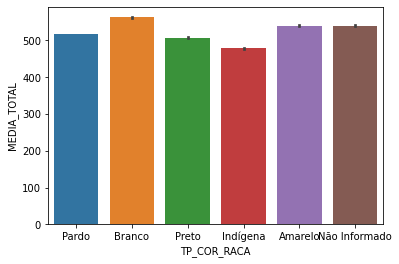

In [48]:
grafico7 = sns.barplot(x = dfm['TP_COR_RACA'], y = dfm['MEDIA_TOTAL'], estimator = np.mean, data = dfm)

### Grafico das notas em Ciências da Natureza
O grafico a baixo mostra a média da nota de ciências da natureza das pessoas de cor/raça autodeclarados masculinas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

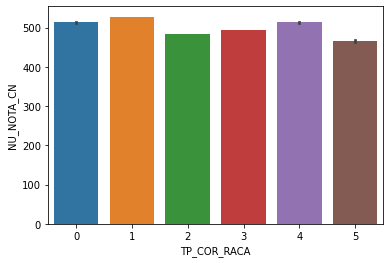

In [27]:
grafico8 = sns.barplot(x = dfm['TP_COR_RACA'], y = dfm['NU_NOTA_CN'], estimator = np.mean, data = dfm)

### Grafico das notas em Ciências Humanas
O grafico a baixo mostra a média da nota de Ciências Humanas de pessoas de cor/raça autodeclarados masculinas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

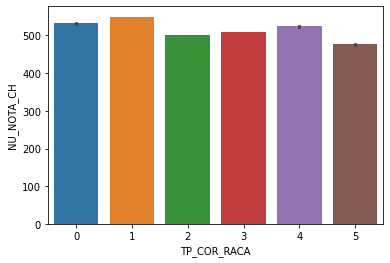

In [28]:
grafico9 = sns.barplot(x = dfm['TP_COR_RACA'], y = dfm['NU_NOTA_CH'], estimator = np.mean, data = dfm)

### Grafico das notas em Linguagens e Códigos
O grafico a baixo mostra a média da nota de Linguagens e Códigos de pessoas de cor/raça autodeclarados masculinas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

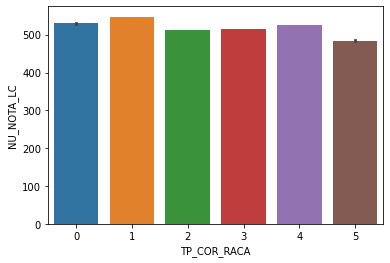

In [29]:
grafico10 = sns.barplot(x = dfm['TP_COR_RACA'], y = dfm['NU_NOTA_LC'], estimator = np.mean, data = dfm)

### Gráfico das notas em Matemática
O grafico a baixo mostra a média da nota de Matemática de pessoas de cor/raça autodeclarados masculinas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

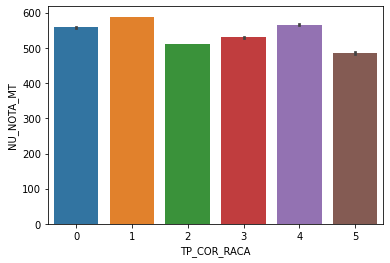

In [30]:
grafico11 = sns.barplot(x = dfm['TP_COR_RACA'], y = dfm['NU_NOTA_MT'], estimator = np.mean, data = dfm)

### Gráfico das notas em Redação
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados masculinas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

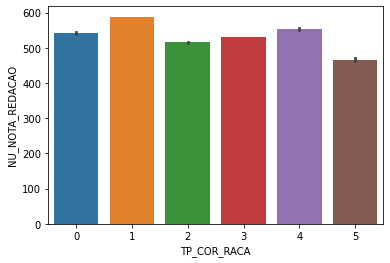

In [31]:
grafico12 = sns.barplot(x = dfm['TP_COR_RACA'], y = dfm['NU_NOTA_REDACAO'], estimator = np.mean, data = dfm)

## Comparando a média das notas de mulheres:Não Informado(0), Branco(1), Preto(2), Parda(3), Amarela(4) e Indígena(5).

In [49]:
#Separando uma variavel só com usuarios Femininas
dff = df2[df2['TP_SEXO']=='F']
frequencia_f = dff['TP_COR_RACA'].value_counts(ascending=False)
print(frequencia_f)
#Quantidade de participantes de cada cor/raça

Series([], Name: TP_COR_RACA, dtype: int64)


### Grafico da média total
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados femininas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

In [50]:
grafico13 = sns.barplot(x = dff['TP_COR_RACA'], y = dff['MEDIA_TOTAL'], estimator = np.mean, data = dff)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Grafico das notas em Ciências da Natureza
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados femininas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

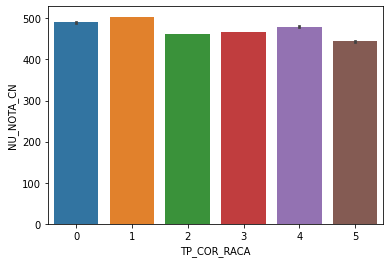

In [34]:
grafico14 = sns.barplot(x = dff['TP_COR_RACA'], y = dff['NU_NOTA_CN'], estimator = np.mean, data = dff)

### Grafico das notas em Ciências Humanas
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados femininas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

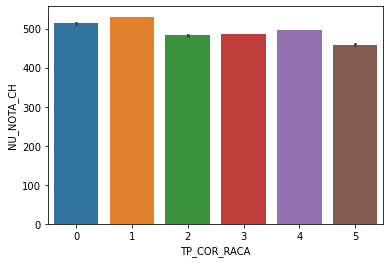

In [35]:
grafico15 = sns.barplot(x = dff['TP_COR_RACA'], y = dff['NU_NOTA_CH'], estimator = np.mean, data = dff)

### Grafico das notas em Linguagens e Códigos
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados femininas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

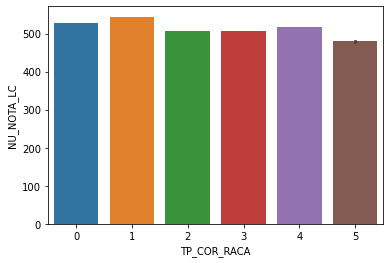

In [36]:
grafico16 = sns.barplot(x = dff['TP_COR_RACA'], y = dff['NU_NOTA_LC'], estimator = np.mean, data = dff)

### Gráfico das notas em Matemática
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados femininas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

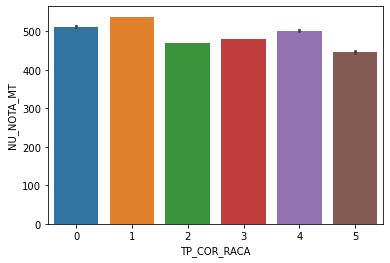

In [37]:
grafico17 = sns.barplot(x = dff['TP_COR_RACA'], y = dff['NU_NOTA_MT'], estimator = np.mean, data = dff)

### Gráfico das notas em Redação
O grafico a baixo mostra a média da nota de Redação de pessoas de cor/raça autodeclarados femininas, nota-se que as pessoas brancas tiveram a média maior.
OBSERVAÇÃO:Prestar atenção na diferença de participantes de determinada cor/raça que fizeram a prova.

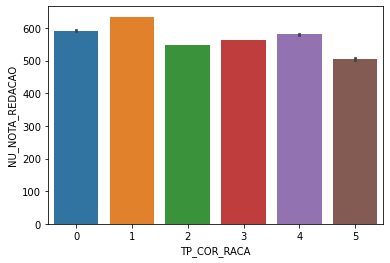

In [38]:
grafico18 = sns.barplot(x = dff['TP_COR_RACA'], y = dff['NU_NOTA_REDACAO'], estimator = np.mean, data = dff)